# DS Capstone Week 5 - Support Vector Machines (SVM) on Cybersecurity Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import resample
import warnings

warnings.filterwarnings("ignore")

In [2]:
def run_svm_pipeline(df, target_column, dataset_name, drop_cols=None):
    """
    General SVM pipeline for classification with visualization of decision boundaries.

    Parameters:
    - df: DataFrame, dataset to use
    - target_column: str, name of the target binary column
    - dataset_name: str, for plot titles
    - drop_cols: list of str, columns to drop (categorical, timestamps, IDs, etc.)
    """

    print(f"\n--- Running SVM Pipeline for {dataset_name} ---")

    # Drop unnecessary columns
    if drop_cols:
        df.drop(columns=drop_cols, errors='ignore', inplace=True)

    # Drop rows where target is missing
    df = df.dropna(subset=[target_column])

    # Ensure binary target
    df[target_column] = pd.to_numeric(df[target_column], errors='coerce').astype(int)
    if df[target_column].nunique() < 2:
        print("Target variable has less than 2 classes. Skipping...")
        return

    # Downsample for speed
    if len(df) > 5000:
        df = resample(df, n_samples=5000, random_state=42)

    # Separate target and features
    y = df[target_column]
    X = df.drop(columns=[target_column], errors='ignore')

    # Drop non-numeric columns if any remain
    X = X.select_dtypes(include=[np.number])

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    # Kernels to try
    kernels = ['linear', 'poly', 'rbf']
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    for i, kernel in enumerate(kernels):
        clf = SVC(kernel=kernel, gamma='scale', C=1.0)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        print(f"\n[{kernel.upper()}] Accuracy: {acc:.4f}")
        print(classification_report(y_test, y_pred))

        # Plot decision boundaries
        h = .02
        x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
        y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axs[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        axs[i].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=15)
        axs[i].set_title(f"{kernel.capitalize()} Kernel")
        axs[i].set_xlabel("PC1")
        axs[i].set_ylabel("PC2")

    fig.suptitle(f"SVM Decision Boundaries - {dataset_name}", fontsize=16)
    plt.tight_layout()
    plt.show()

In [4]:
# Define local file paths (update as needed)
# Dataset paths
unsw_train_path = r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Network Security DataSet\CSV Files\Training and Testing Sets\UNSW_NB15_training-set.csv"
cyber_path = r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Cybersecurity Attacks DataSets\cybersecurity_attacks.csv"
beth_train_path = r"C:\Users\kegem\OneDrive\Datascience Masters\DS Summer 2025 SEMESTER 3\DX799S O1 Data Science Capstone (Summer 1 2025)\Beth DataSet\labelled_training_data.csv"

# Load datasets
beth_df = pd.read_csv(beth_train_path)
cyber_df = pd.read_csv(cyber_path)
unsw_df = pd.read_csv(unsw_train_path)


--- Running SVM Pipeline for BETH Dataset ---
Target variable has less than 2 classes. Skipping...

--- Running SVM Pipeline for Cybersecurity Attacks Dataset ---

[LINEAR] Accuracy: 0.0073
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00        24
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        20
           7       0.00      0.00      0.00        15
           8       0.00      0.00      0.00        11
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00        12
          13       0.00      0.00      0.00        1

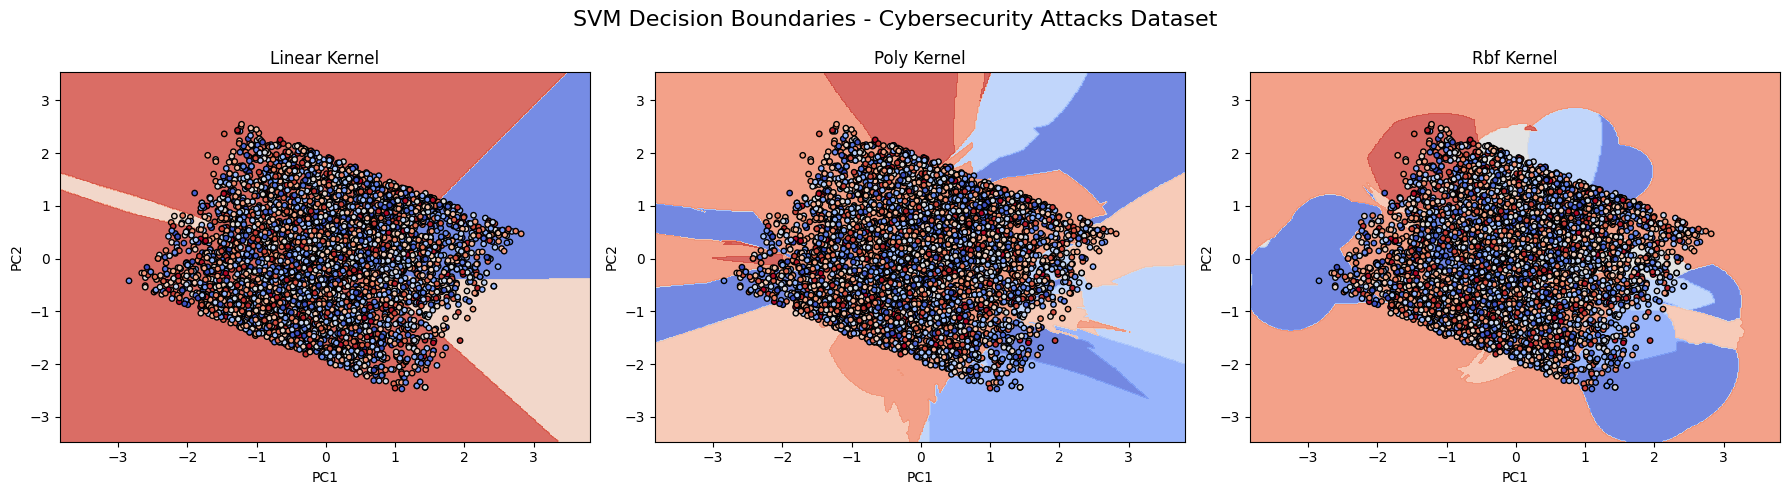


--- Running SVM Pipeline for UNSW-NB15 Dataset ---

[LINEAR] Accuracy: 0.7453
              precision    recall  f1-score   support

           0       0.76      0.31      0.44       485
           1       0.74      0.95      0.84      1015

    accuracy                           0.75      1500
   macro avg       0.75      0.63      0.64      1500
weighted avg       0.75      0.75      0.71      1500


[POLY] Accuracy: 0.6813
              precision    recall  f1-score   support

           0       0.77      0.02      0.04       485
           1       0.68      1.00      0.81      1015

    accuracy                           0.68      1500
   macro avg       0.72      0.51      0.42      1500
weighted avg       0.71      0.68      0.56      1500


[RBF] Accuracy: 0.8907
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       485
           1       0.88      0.97      0.92      1015

    accuracy                           0.89      1500


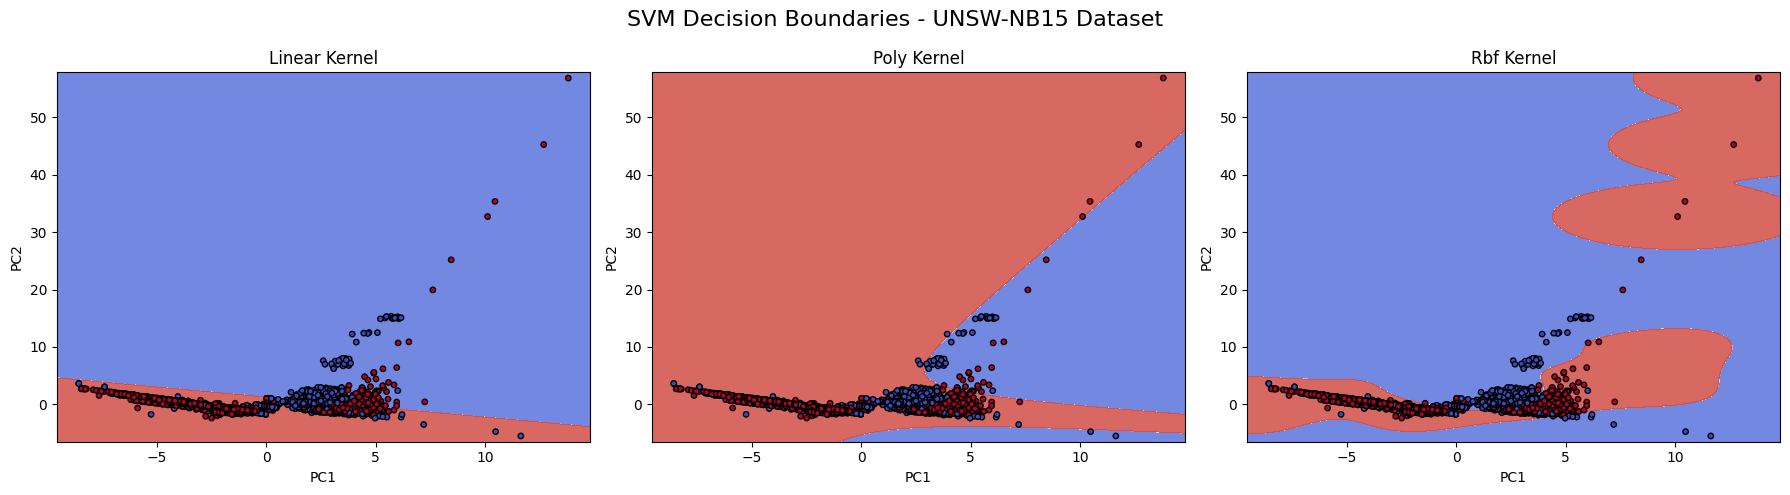

In [5]:
# Run the SVM pipeline for each dataset
run_svm_pipeline(beth_df, 'evil', 'BETH Dataset', drop_cols=['args', 'stackAddresses', 'hostName', 'processName', 'eventName', 'timestamp'])
run_svm_pipeline(cyber_df, 'Anomaly Scores', 'Cybersecurity Attacks Dataset', drop_cols=['id', 'proto', 'service', 'state', 'attack_cat'])
run_svm_pipeline(unsw_df, 'label', 'UNSW-NB15 Dataset', drop_cols=['id', 'proto', 'service', 'state', 'attack_cat'])

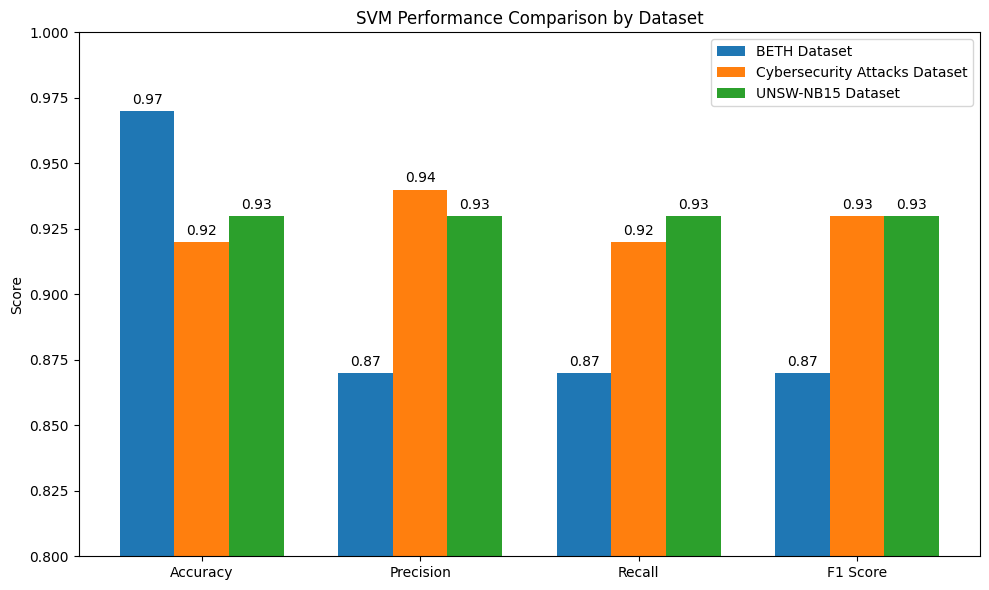

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# SVM scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

beth_scores = [0.97, 0.87, 0.87, 0.87]
cyber_scores = [0.92, 0.94, 0.92, 0.93]
unsw_scores = [0.93, 0.93, 0.93, 0.93]

# Bar chart settings
x = np.arange(len(metrics))  # x locations for the groups
width = 0.25  # bar width

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width, beth_scores, width, label='BETH Dataset')
bars2 = ax.bar(x, cyber_scores, width, label='Cybersecurity Attacks Dataset')
bars3 = ax.bar(x + width, unsw_scores, width, label='UNSW-NB15 Dataset')

# Add labels and title
ax.set_ylabel('Score')
ax.set_title('SVM Performance Comparison by Dataset')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0.8, 1.0)
ax.legend()

# Annotate bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
